In [185]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

In [186]:
"""Our system of differential equations belongs to the complex space, that is why we implemented the code suggested in"""
"""https://stackoverflow.com/questions/19910189/scipy-odeint-with-complex-initial-values."""

import time
import numpy as np
from scipy.integrate import odeint
from scipy.special import zeta
from random import choices

def odeintz(func, z0, t, **kwargs):
   
    
    """An odeint-like function for complex valued differential equations.

    Inputs:
    ----------
      -func: function associated to dr/dt=f(x;t), where x is the set of parameters and variables to be determined
      -z0: 1d array with length N*(5N-1)/2
      -t: 1d array from t=0 to t=tf (parameter set by the user)
      - **kwargs: keyword arguments related with external functions to be used in odeint
    
    Return:
      -z: multivariable array with the solution of the differential equation associated with each variable"""

    # Disallow Jacobian-related arguments.
    _unsupported_odeint_args = ['Dfun', 'col_deriv', 'ml', 'mu']
    bad_args = [arg for arg in kwargs if arg in _unsupported_odeint_args]
    if len(bad_args) > 0:
        raise ValueError("The odeint argument %r is not supported by "
                         "odeintz." % (bad_args[0],))

    # Make sure z0 is a numpy array of type np.complex128.
    z0 = np.array(z0, dtype=np.complex128, ndmin=1)

    def realfunc(x, t, *args):
        z = x.view(np.complex128)
        dzdt = func(z, t, *args)
        # func might return a python list, so convert its return
        # value to an array with type np.complex128, and then return
        # a np.float64 view of that array.
        return np.asarray(dzdt, dtype=np.complex128).view(np.float64)

    result = odeint(realfunc, z0.view(np.float64), t, **kwargs)

    if kwargs.get('full_output', False):
        z = result[0].view(np.complex128)
        infodict = result[1]
        return z, infodict
    else:
        z = result.view(np.complex128)
        return z

In [197]:
def Jij(J,j,w,epsilon,N,Vect):
    
    norm=np.linalg.norm(np.array(Vect[j])-np.array(Vect[w]))
    
    return (J/N)*(1/norm**epsilon)*(1/dist_ar**epsilon)
    
    

In [246]:
#length_side=2
#N=length_side**3

N=40
J=1
epsilon=0

refgamma=0.2  #Fixed
refomega=5



Gamma_phi=refgamma*J
Omega=refomega*J
dist_ar=1


#for -z

def init_vect(N=N):
    rx=[]
    ry=[]
    rz=[]
    for j in range(N):
        
        a=(choices([-1,1]))[0]
        b=(choices([-1,1]))[0]
        
        rx.append(a)
        ry.append(b)
        rz.append(-1)


    return rx+ry+rz



def Vectors(length_side):
    vect=[]
    for j in range(length_side**3):
        b=j//length_side**2
        c=(j-b*length_side**2)//length_side
        d=j-b*length_side**2-c*length_side
        vect.append([b,c,d])
    return vect


#Vect=Vectors(length_side)


def Jij(J,j,w,epsilon,N,Vect):
    
    norm=np.linalg.norm(np.array(Vect[j])-np.array(Vect[w]))
    
    return (J/N)*(1/norm**epsilon)*(1/dist_ar**epsilon)

Vect=[]

def vectorsR(r, t,N=N,J=J,epsilon=epsilon,Gamma_phi=Gamma_phi,Omega=Omega,Vect=Vect):   
    
    #matrix_zero=np.zeros((int(3*N),int(3*N)),dtype = 'complex_')
    matrix_zero=np.zeros((int(3*N),int(3*N)))
    
    
    drdt =  np.matmul(matrix_zero, r)  #matrix_zero @ r   #sum of the linear and the constant part
    #drdt = matrix_zero @ r
    
    
    ###Define Vect which is an array of coordinates of size N
    
    
    for j in range(N):
        
        
        drdt[j]=drdt[j]-Gamma_phi*r[j]   #s_i^x
        drdt[j+N]=drdt[j+N]-Omega*r[j+2*N]-Gamma_phi*r[j+N]    #s_i^y
        drdt[j+2*N]=drdt[j+2*N]+Omega*r[j+N]    #s_i^z
    
    
       
        for w in range(N):
            
            if w!=j:
                #norm=np.linalg.norm(np.array(Vect[j])-np.array(Vect[w]))
                
                
                #drdt[j]=drdt[j]-2* r[j+N]*r[w+2*N]*(J/N)*(1/norm**epsilon)*(1/dist_ar**epsilon)  #s_i^x
                #drdt[j+N]=drdt[j+N]+2* r[j]*r[w+2*N]*(J/N)*(1/norm**epsilon)*(1/dist_ar**epsilon)  #s_i^y  
                
                drdt[j]=drdt[j]-2* r[j+N]*r[w+2*N]*(J/N)  #s_i^x  all to all
                drdt[j+N]=drdt[j+N]+2* r[j]*r[w+2*N]*(J/N)  #s_i^y             
        
               
    return drdt





40 1.9652159214019775


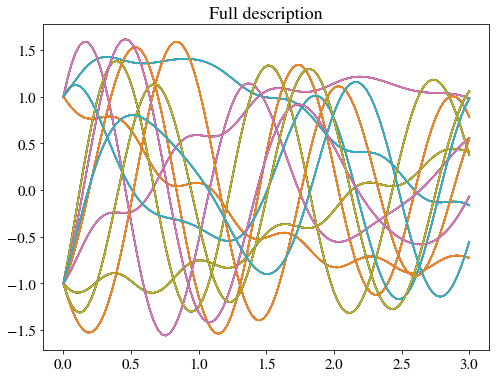

In [247]:
r0=init_vect(N)

init_time=0
final_time=3
steps=100


t = np.linspace(init_time, final_time, steps)

import time

t0=time.time()

#z=odeintz(vectorsR, r0, t)#, args=(N,L))

z=odeint(vectorsR, r0, t)#, args=(N,L))


t1=time.time()

print(N,t1-t0)

plt.title("Full description")

for j in range(3*N):
    plt.plot(t,np.real(z[:,j]),label="Re"+str(j))
    #plt.plot(t,np.imag(z[:,j]),'-.',label="Im"+str(j))

In [248]:
def S_array(z):
    Sx=z[:,0]
    Sy=z[:,N]
    Sz=z[:,2*N]
    
    for j in range(1,N):
        Sx=np.add(Sx,z[:,j])
        Sy=np.add(Sy,z[:,N+j])
        Sz=np.add(Sz,z[:,2*N+j])
    
    Sx=Sx/2
    Sy=Sy/2
    Sz=Sz/2
    
    
    return Sx, Sy, Sz


def history(n):
    
    count=1

    z0=init_vect(N)
    z = odeint(vectorsR, z0, t)
    
    Sx=S_array(z)[0]
    Sy=S_array(z)[1]
    Sz=S_array(z)[2]
    
    Sxx=(Sx)**2
    Syy=(Sy)**2
    Szz=(Sz)**2
    

    for j in range(2,n+1):
        
        count=count+1
        
        z0=init_vect(N)
        z = odeint(vectorsR, z0, t)
        
        Sx = Sx+S_array(z)[0]
        Sy = Sy+S_array(z)[1]
        Sz = Sz+S_array(z)[2]
        
        
        Sxx = Sxx+(S_array(z)[0])**2
        Syy = Syy+(S_array(z)[1])**2
        Szz = Szz+(S_array(z)[2])**2
        
        
    return Sx/count,Sy/count,Sz/count,Sxx/count,Syy/count,Szz/count

In [249]:
t=np.linspace(0,3,60)

t0=time.time()
a=history(100)
t1=time.time()

print(t1-t0)



194.32761979103088


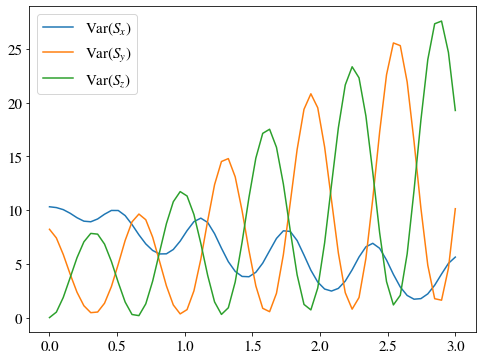

In [250]:

plt.plot(t,a[3]-(a[0])**2,label="Var($S_x$)")
plt.plot(t,a[4]-(a[1])**2,label="Var($S_y$)")
plt.plot(t,a[5]-(a[2])**2,label="Var($S_z$)")
plt.legend();


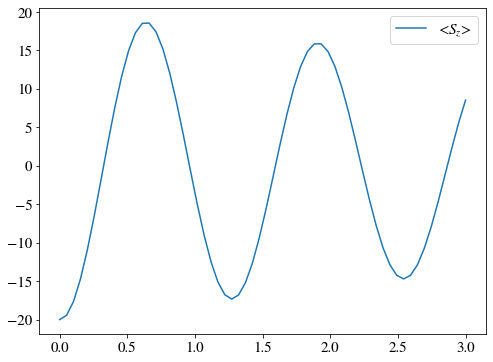

In [251]:

plt.plot(J*t,a[2],label="<$S_z$>")

plt.legend();

In [253]:
a[2]

array([-20.        , -19.44084159, -17.64702386, -14.75907259,
       -10.98624401,  -6.58397351,  -1.83302286,   2.97640845,
         7.55612347,  11.6300902 ,  14.94688653,  17.2960787 ,
        18.52693825,  18.56499634,  17.42110952,  15.1896976 ,
        12.03664214,   8.18082032,   3.87450214,  -0.61351752,
        -5.01101157,  -9.05321308, -12.49420695, -15.12074374,
       -16.76819439, -17.3358958 , -16.79780167, -15.20504112,
       -12.67945458,  -9.40008814,  -5.58641614,  -1.48193275,
         2.65992976,   6.58771766,  10.06327354,  12.874074  ,
        14.8469746 ,  15.86193761,  15.86294816,  14.86323285,
        12.94323058,  10.2418571 ,   6.94336205,   3.26266664,
        -0.56862572,  -4.3147705 ,  -7.74749181, -10.65767951,
       -12.86770674, -14.2437519 , -14.70637333, -14.23714563,
       -12.879736  , -10.73513257,  -7.95217013,  -4.71535464,
        -1.2319477 ,   2.28048725,   5.60584127,   8.54090887])

In [254]:

Omega1=np.array([-20.        , -19.95754513, -19.86452293, -19.72255117,
       -19.53379787, -19.30091869, -19.02698292, -18.71539155,
       -18.36979142, -17.99398895, -17.59186675, -17.16730598,
       -16.72411674, -16.26597783, -15.79638693, -15.31862136,
       -14.83570928, -14.35041064, -13.86520693, -13.38229862,
       -12.90360905, -12.43079363, -11.96525294, -11.50814893,
       -11.060423  , -10.62281527, -10.19588429,  -9.78002663,
        -9.37549604,  -8.98242159,  -8.60082493,  -8.23063619,
        -7.87170871,  -7.52383241,  -7.18674589,  -6.86014732,
        -6.54370411,  -6.23706157,  -5.93985048,  -5.6516938 ,
        -5.37221255,  -5.10103093,  -4.83778076,  -4.58210533,
        -4.3336627 ,  -4.09212854,  -3.85719846,  -3.62858998,
        -3.4060441 ,  -3.18932649,  -2.97822838,  -2.77256705,
        -2.57218602,  -2.37695499,  -2.18676933,  -2.00154941,
        -1.82123953,  -1.64580664,  -1.47523875,  -1.30954314])

Omega2=np.array([-2.00000000e+01, -1.99110137e+01, -1.96208449e+01, -1.91372033e+01,
       -1.84712287e+01, -1.76368637e+01, -1.66501143e+01, -1.55282784e+01,
       -1.42892082e+01, -1.29506673e+01, -1.15298187e+01, -1.00428637e+01,
       -8.50483262e+00, -6.92951686e+00, -5.32951921e+00, -3.71639733e+00,
       -2.10087168e+00, -4.93070210e-01,  1.09721651e+00,  2.66029332e+00,
        4.18635273e+00,  5.66531955e+00,  7.08676246e+00,  8.43988324e+00,
        9.71358919e+00,  1.08966485e+01,  1.19779214e+01,  1.29466534e+01,
        1.37928103e+01,  1.45074290e+01,  1.50829570e+01,  1.55135531e+01,
        1.57953233e+01,  1.59264750e+01,  1.59073790e+01,  1.57405362e+01,
        1.54304571e+01,  1.49834673e+01,  1.44074581e+01,  1.37116022e+01,
        1.29060583e+01,  1.20016825e+01,  1.10097625e+01,  9.94178932e+00,
        8.80927058e+00,  7.62359176e+00,  6.39592231e+00,  5.13716350e+00,
        3.85793084e+00,  2.56856256e+00,  1.27914458e+00, -4.57943812e-04,
       -1.26057163e+00, -2.49169687e+00, -3.68450728e+00, -4.82987115e+00,
       -5.91889712e+00, -6.94300393e+00, -7.89401164e+00, -8.76424979e+00])


Omega3=np.array([-2.00000000e+01, -1.97952401e+01, -1.91271626e+01, -1.80220275e+01,
       -1.65186561e+01, -1.46654164e+01, -1.25169323e+01, -1.01310389e+01,
       -7.56637107e+00, -4.88078180e+00, -2.13058869e+00,  6.29509367e-01,
        3.34610723e+00,  5.96666567e+00,  8.43927865e+00,  1.07128805e+01,
        1.27380463e+01,  1.44684149e+01,  1.58626284e+01,  1.68865468e+01,
        1.75154067e+01,  1.77355642e+01,  1.75455150e+01,  1.69560084e+01,
        1.59892412e+01,  1.46772818e+01,  1.30599942e+01,  1.11827918e+01,
        9.09452168e+00,  6.84571041e+00,  4.48728687e+00,  2.06978721e+00,
       -3.57049240e-01, -2.74444779e+00, -5.04471248e+00, -7.21145985e+00,
       -9.20010558e+00, -1.09686720e+01, -1.24789054e+01, -1.36976146e+01,
       -1.45980757e+01, -1.51613176e+01, -1.53771027e+01, -1.52444583e+01,
       -1.47716828e+01, -1.39758310e+01, -1.28817587e+01, -1.15208595e+01,
       -9.92965690e+00, -8.14840351e+00, -6.21981192e+00, -4.18799032e+00,
       -2.09760153e+00,  6.78533941e-03,  2.08121785e+00,  4.08284225e+00,
        5.97042539e+00,  7.70497583e+00,  9.25048805e+00,  1.05747937e+01])

Omega4=np.array([-20.        , -19.65544343, -18.50780953, -16.62224581,
       -14.09598032, -11.04916426,  -7.6157708 ,  -3.93624398,
        -0.15261703,   3.59419831,   7.16598503,  10.4289806 ,
        13.25696917,  15.53627375,  17.17238933,  18.09717131,
        18.27496863,  17.70611425,  16.4268021 ,  14.50536522,
        12.03592488,   9.13092971,   5.91408413,   2.51466671,
        -0.93648299,  -4.30969993,  -7.47876118, -10.32357181,
       -12.73389717, -14.61426254, -15.88954332, -16.5102834 ,
       -16.4565963 , -15.73971633, -14.4008116 , -12.50734143,
       -10.14778324,  -7.4257834 ,  -4.45466192,  -1.35281744,
         1.75989441,   4.76513418,   7.54893392,  10.00493336,
        12.03825115,  13.56987208,  14.54105956,  14.91706814,
        14.68942968,  13.87633026,  12.52099794,  10.68843686,
         8.46112701,   5.93438063,   3.21191076,   0.40190143,
        -2.38642138,  -5.04593557,  -7.47478372,  -9.57977438])
Omega5=np.array([-20.        , -19.44084159, -17.64702386, -14.75907259,
       -10.98624401,  -6.58397351,  -1.83302286,   2.97640845,
         7.55612347,  11.6300902 ,  14.94688653,  17.2960787 ,
        18.52693825,  18.56499634,  17.42110952,  15.1896976 ,
        12.03664214,   8.18082032,   3.87450214,  -0.61351752,
        -5.01101157,  -9.05321308, -12.49420695, -15.12074374,
       -16.76819439, -17.3358958 , -16.79780167, -15.20504112,
       -12.67945458,  -9.40008814,  -5.58641614,  -1.48193275,
         2.65992976,   6.58771766,  10.06327354,  12.874074  ,
        14.8469746 ,  15.86193761,  15.86294816,  14.86323285,
        12.94323058,  10.2418571 ,   6.94336205,   3.26266664,
        -0.56862572,  -4.3147705 ,  -7.74749181, -10.65767951,
       -12.86770674, -14.2437519 , -14.70637333, -14.23714563,
       -12.879736  , -10.73513257,  -7.95217013,  -4.71535464,
        -1.2319477 ,   2.28048725,   5.60584127,   8.54090887])

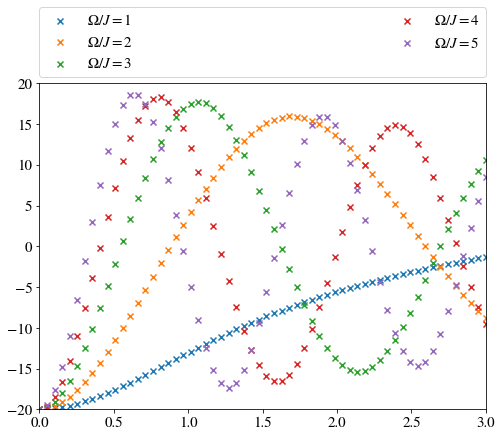

In [268]:
plt.scatter(J*t,Omega1,label="$\Omega/J=1$",marker="x")
plt.scatter(J*t,Omega2,label="$\Omega/J=2$",marker="x")
plt.scatter(J*t,Omega3,label="$\Omega/J=3$",marker="x")
plt.scatter(J*t,Omega4,label="$\Omega/J=4$",marker="x")
plt.scatter(J*t,Omega5,label="$\Omega/J=5$",marker="x")

plt.xlim(0,3)
plt.ylim(-20,20)

plt.legend(bbox_to_anchor=(0., 1.02, 1.0, .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)




<img src="Capture.png" style="width:500px;height:280px"/>